In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.style.use("seaborn-v0_8")


In [8]:
df = pd.read_csv("../data/customer_data.csv")
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [10]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [11]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Drop duplicates
df.drop_duplicates(inplace=True)

# Check missing values
df.isnull().sum()


income                  0
kidhome                 0
teenhome                0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
age                     0
customer_days           0
marital_divorced        0
marital_married         0
marital_single          0
marital_together        0
marital_widow           0
education_2n_cycle      0
education_basic         0
education_graduation    0
education_master        0
education_phd           0
mnttotal                0
mntregularprods         0
acceptedcmpo

In [12]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [14]:
df.columns


Index(['income', 'kidhome', 'teenhome', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'age', 'customer_days', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_together', 'marital_widow',
       'education_2n_cycle', 'education_basic', 'education_graduation',
       'education_master', 'education_phd', 'mnttotal', 'mntregularprods',
       'acceptedcmpoverall'],
      dtype='object')

In [15]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns


Index(['income', 'kidhome', 'teenhome', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'age', 'customer_days', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_together', 'marital_widow',
       'education_2n_cycle', 'education_basic', 'education_graduation',
       'education_master', 'education_phd', 'mnttotal', 'mntregularprods',
       'acceptedcmpoverall'],
      dtype='object')

In [16]:
features = df[['income', 'age', 'mnttotal']]
features.head()


,income,age,mnttotal
0,58138.0,63,1529
1,46344.0,66,21
2,71613.0,55,734
3,26646.0,36,48
4,58293.0,39,407


In [17]:
features.dtypes


income      float64
age           int64
mnttotal      int64
dtype: object

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [19]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


c:\Users\Vaishnavi\OneDrive\Desktop\Oasis_Infobyte\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Vaishnavi\OneDrive\Desktop\Oasis_Infobyte\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Vaishnavi\OneDrive\Desktop\Oasis_Infobyte\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Vaishnavi\AppData\Local\Programs\Python\Python311\Lib\subprocess

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)


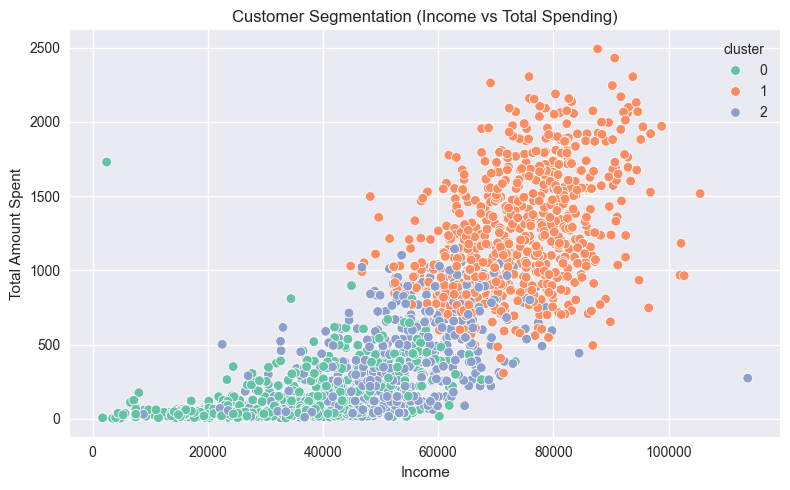

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,5))

sns.scatterplot(
    x=df['income'],
    y=df['mnttotal'],
    hue=df['cluster'],
    palette='Set2',
    ax=ax
)

ax.set_title("Customer Segmentation (Income vs Total Spending)")
ax.set_xlabel("Income")
ax.set_ylabel("Total Amount Spent")

fig.tight_layout()
fig.savefig("../visuals/customer_segments.png", dpi=300)
plt.show()


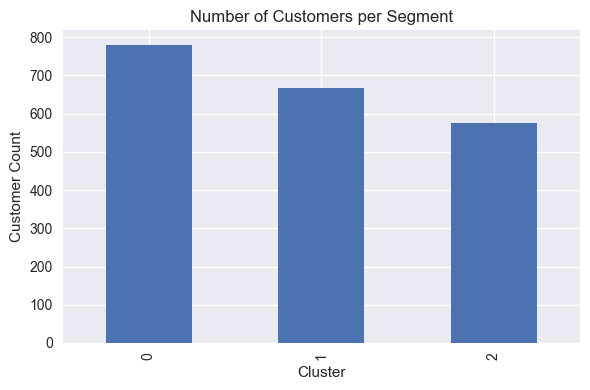

In [31]:
fig, ax = plt.subplots(figsize=(6,4))

df['cluster'].value_counts().sort_index().plot(
    kind='bar',
    ax=ax
)

ax.set_title("Number of Customers per Segment")
ax.set_xlabel("Cluster")
ax.set_ylabel("Customer Count")

fig.tight_layout()
fig.savefig("../visuals/cluster_distribution.png", dpi=300)
plt.show()


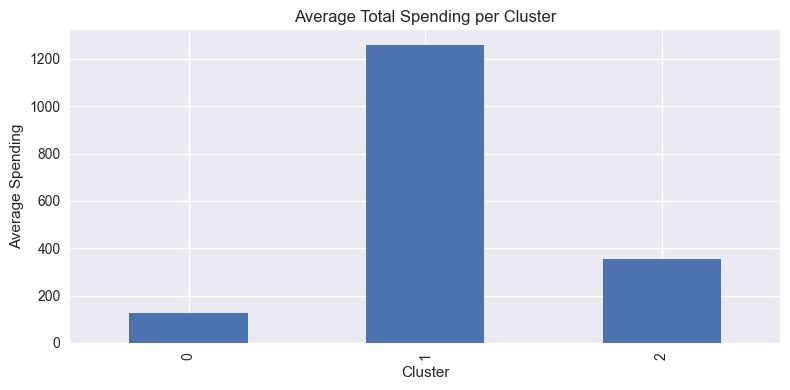

In [32]:
cluster_summary = df.groupby('cluster')[['income', 'mnttotal', 'age']].mean()

fig, ax = plt.subplots(figsize=(8,4))

cluster_summary['mnttotal'].plot(
    kind='bar',
    ax=ax
)

ax.set_title("Average Total Spending per Cluster")
ax.set_xlabel("Cluster")
ax.set_ylabel("Average Spending")

fig.tight_layout()
fig.savefig("../visuals/avg_spending_per_cluster.png", dpi=300)
plt.show()


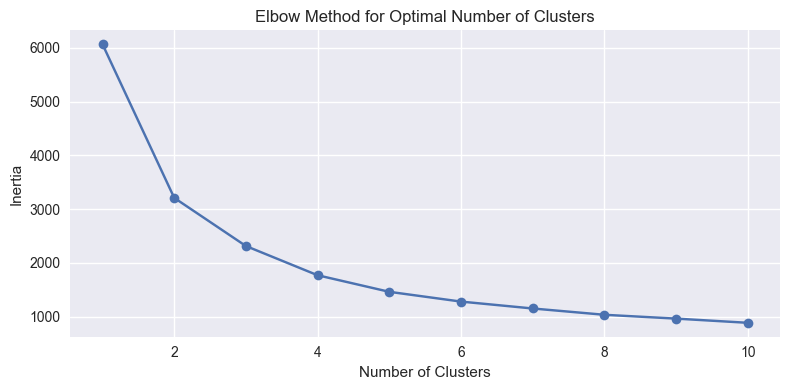

In [33]:
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(range(1,11), inertia, marker='o')
ax.set_title("Elbow Method for Optimal Number of Clusters")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Inertia")

fig.tight_layout()
fig.savefig("../visuals/elbow_method.png", dpi=300)
plt.show()


In [22]:
df['cluster'].value_counts()


cluster
0    779
1    666
2    576
Name: count, dtype: int64

In [24]:
plt.savefig("../visuals/customer_segments.png", dpi=300, bbox_inches="tight")


<Figure size 800x550 with 0 Axes>

## Customer Segment Interpretation

- Cluster 0: High-income customers with high spending – premium customers
- Cluster 1: Medium-income customers with moderate spending – regular customers
- Cluster 2: Low-income customers with low spending – price-sensitive customers
